In [1]:
import pandas as pd
from keras.layers import Flatten
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
import numpy as np
import glob
import os
import tensorflow as tf
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
files_path_1= r"C:\Users\anupa\Downloads\Python\Deep Learning to AI\NLP_text mining\txt_sentoken\txt_sentoken\pos"
files_path_2= r"C:\Users\anupa\Downloads\Python\Deep Learning to AI\NLP_text mining\txt_sentoken\txt_sentoken\neg"

def load_doc(filepath):
    data=[]
    files=os.listdir(filepath)
    for fle in files:
 
        with open(os.path.join(filepath, fle),"r") as f:
        
            text = f.read()
            data.append(text)
            f.close()
    return data

In [2]:
positive_data=load_doc(files_path_1)

In [41]:
positive_data[0]

0      films adapted from comic books have had plenty...
1      every now and then a movie comes along from a ...
2      you've got mail works alot better than it dese...
3       " jaws " is a rare film that grabs your atten...
4      moviemaking is a lot like being the general ma...
                             ...                        
995    wow ! what a movie . \nit's everything a movie...
996    richard gere can be a commanding actor , but h...
997    glory--starring matthew broderick , denzel was...
998    steven spielberg's second epic film on world w...
999    truman ( " true-man " ) burbank is the perfect...
Name: 0, Length: 1000, dtype: object

In [4]:
negative_data=load_doc(files_path_2)

In [42]:
negative_data[0]

0      plot : two teen couples go to a church party ,...
1      the happy bastard's quick movie review \ndamn ...
2      it is movies like these that make a jaded movi...
3       " quest for camelot " is warner bros . ' firs...
4      synopsis : a mentally unstable man undergoing ...
                             ...                        
995    if anything , " stigmata " should be taken as ...
996    john boorman's " zardoz " is a goofy cinematic...
997    the kids in the hall are an acquired taste . \...
998    there was a time when john carpenter was a gre...
999    two party guys bob their heads to haddaway's d...
Name: 0, Length: 1000, dtype: object

In [6]:
positive_data=pd.DataFrame(positive_data)
positive_data["Labels"]=pd.DataFrame(np.hstack(np.ones(positive_data.shape[0]).T))
positive_data

,0,Labels
0,films adapted from comic books have had plenty...,1.0
1,every now and then a movie comes along from a ...,1.0
2,you've got mail works alot better than it dese...,1.0
3,""" jaws "" is a rare film that grabs your atten...",1.0
4,moviemaking is a lot like being the general ma...,1.0
...,...,...
995,wow ! what a movie . \nit's everything a movie...,1.0
996,"richard gere can be a commanding actor , but h...",1.0
997,"glory--starring matthew broderick , denzel was...",1.0
998,steven spielberg's second epic film on world w...,1.0


In [7]:
negative_data=pd.DataFrame(negative_data)
negative_data["Labels"]=pd.DataFrame(np.hstack(np.zeros(negative_data.shape[0]).T))
negative_data

,0,Labels
0,"plot : two teen couples go to a church party ,...",0.0
1,the happy bastard's quick movie review \ndamn ...,0.0
2,it is movies like these that make a jaded movi...,0.0
3,""" quest for camelot "" is warner bros . ' firs...",0.0
4,synopsis : a mentally unstable man undergoing ...,0.0
...,...,...
995,"if anything , "" stigmata "" should be taken as ...",0.0
996,"john boorman's "" zardoz "" is a goofy cinematic...",0.0
997,the kids in the hall are an acquired taste . \...,0.0
998,there was a time when john carpenter was a gre...,0.0


In [8]:
new_data=pd.concat([positive_data, negative_data],ignore_index=True)

In [9]:
from sklearn.utils import shuffle
new_data=shuffle(new_data)
new_data

,0,Labels
1479,"i have a great idea for a movie , one that can...",0.0
1207,"for "" original sin , "" the road to the screen ...",0.0
479,50's `aliens vs . \nearth' idea revamped ! \ni...,1.0
1549,cradle will rock is the latest effort from dir...,0.0
626,this reviewer is ignorant of what hands were r...,1.0
...,...,...
1191,"after enduring mariah carey's film debut , gli...",0.0
253,""" good will hunting "" is two movies in one : ...",1.0
1274,"the tagline for this film is : "" some houses a...",0.0
1571,plot : a little boy born in east germany ( nam...,0.0


In [10]:
features=new_data.iloc[:,0]
labels=new_data.iloc[:,-1]

In [11]:
stop_words=set(stopwords.words("english"))
stemm=PorterStemmer()
from nltk.stem import WordNetLemmatizer
lemm=WordNetLemmatizer()
def data_clean(data):
    for i in range(len(data)):
        cleaned_data=" "
        data[i]=re.sub(r"[^a-z A-Z]", ' ', data[i])
        data[i]=data[i].lower()
        words=nltk.word_tokenize(data[i])
        words=[word for word in words if not word in stop_words]
        for w in words:
            cleaned_data=cleaned_data+" "+str(lemm.lemmatize(w))
        data[i]=cleaned_data
    return data

In [12]:
clean_features=data_clean(features)

c:\users\anupa\myenv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\anupa\myenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\anupa\myenv\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
clean_features

1479      great idea movie one miss see got coolio son...
1207      original sin road screen rocky initially sla...
479       alien v earth idea revamped following movie ...
1549      cradle rock latest effort director actor tim...
626       reviewer ignorant hand responsible deliverin...
                              ...                        
1191      enduring mariah carey film debut glitter rem...
253       good hunting two movie one independent take ...
1274      tagline film house born bad expect much pres...
1571      plot little boy born east germany named hans...
1433      catch phrase disney rocket man one spoken fr...
Name: 0, Length: 2000, dtype: object

In [14]:
# Importing gensim library for word2vec model, we can also use other approach by creaing BOW or tfidf.
import gensim
documents = [_text.split() for _text in clean_features] 

In [15]:
w2v_model = gensim.models.word2vec.Word2Vec(size=32, window=7,  min_count=2, workers=8)
# Creating vocabulary from the corpus
w2v_model.build_vocab(documents)
vocab=w2v_model.wv.vocab.keys()
vocab_size=len(vocab)
vocab_size

22489

In [16]:
# Training model on the corpus to check symentically similar words
w2v_model.train(documents, total_examples=len(documents), epochs=32)

(21360280, 22477568)

In [17]:
w2v_model.most_similar("original")

c:\users\anupa\myenv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('groundbreaking', 0.6644600629806519),
 ('inferior', 0.6535037755966187),
 ('sequel', 0.6441554427146912),
 ('disappointing', 0.6324331164360046),
 ('spawned', 0.6272044777870178),
 ('continuation', 0.6239487528800964),
 ('rehash', 0.6161706447601318),
 ('entry', 0.6062821745872498),
 ('reshooting', 0.6015687584877014),
 ('unoriginal', 0.6014552712440491)]

In [18]:
tokenizer=Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(clean_features)
word_index=tokenizer.word_index
vocab_len=len(word_index)
print(vocab_len)

34349


In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
training_sequences = tokenizer.texts_to_sequences(clean_features)
training_padded = pad_sequences(training_sequences, maxlen=600, padding="post", truncating="post")

In [20]:
training_padded

array([[  52,  171,    2, ...,    0,    0,    0],
       [ 109, 2522,  891, ...,    0,    0,    0],
       [ 141, 1705,  342, ...,    0,    0,    0],
       ...,
       [5365,    1,  257, ...,    0,    0,    0],
       [  26,   29,  195, ...,    0,    0,    0],
       [ 828, 2635,  384, ...,    0,    0,    0]])

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(training_padded, labels, test_size=0.2, random_state=0)

In [22]:
embedd_matrix = np.zeros((vocab_len, 32))
for word, i in tokenizer.word_index.items():
    
    if word in w2v_model.wv:
        embedd_matrix[i] = w2v_model.wv[word]
print(embedd_matrix.shape)

(34349, 32)


In [23]:
from tensorflow import keras
opt = keras.optimizers.RMSprop(learning_rate=0.001)

In [24]:
model= Sequential()
model.add(Embedding(vocab_len, 32, weights=[embedd_matrix], input_length=600, trainable=False))
model.add(Flatten())
model.add(Dense(250, activation="sigmoid"))
model.add(Dense(175, activation="sigmoid"))
model.add(Dense(100, activation="sigmoid"))
model.add(Dense(90, activation="sigmoid"))
model.add(Dense(75,activation="sigmoid"))
model.add(Dense(1, activation="relu"))
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 600, 32)           1099168   
_________________________________________________________________
flatten (Flatten)            (None, 19200)             0         
_________________________________________________________________
dense (Dense)                (None, 250)               4800250   
_________________________________________________________________
dense_1 (Dense)              (None, 175)               43925     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               17600     
_________________________________________________________________
dense_3 (Dense)              (None, 90)                9090      
_________________________________________________________________
dense_4 (Dense)              (None, 75)                6

In [25]:
history= model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10 ,verbose=1)

Epoch 1/10
50/50 [==============================] - 5s 91ms/step - loss: 7.6353 - accuracy: 0.5050 - val_loss: 8.0210 - val_accuracy: 0.4800
Epoch 2/10
50/50 [==============================] - 4s 85ms/step - loss: 7.6353 - accuracy: 0.5050 - val_loss: 8.0210 - val_accuracy: 0.4800
Epoch 3/10
50/50 [==============================] - 4s 85ms/step - loss: 7.6353 - accuracy: 0.5050 - val_loss: 8.0210 - val_accuracy: 0.4800
Epoch 4/10
50/50 [==============================] - 4s 84ms/step - loss: 7.6353 - accuracy: 0.5050 - val_loss: 8.0210 - val_accuracy: 0.4800
Epoch 5/10
50/50 [==============================] - 4s 84ms/step - loss: 7.6353 - accuracy: 0.5050 - val_loss: 8.0210 - val_accuracy: 0.4800
Epoch 6/10
50/50 [==============================] - 4s 85ms/step - loss: 7.6353 - accuracy: 0.5050 - val_loss: 8.0210 - val_accuracy: 0.4800
Epoch 7/10
50/50 [==============================] - 4s 85ms/step - loss: 7.6353 - accuracy: 0.5050 - val_loss: 8.0210 - val_accuracy: 0.4800
Epoch 8/10
50

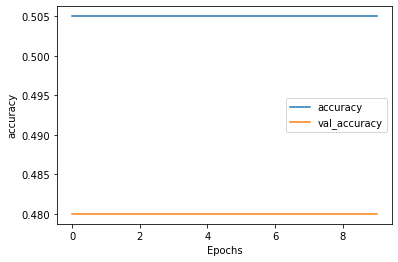

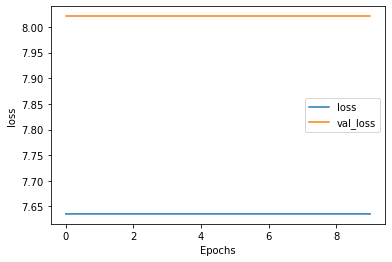

In [26]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [31]:
# As neural network is not providing satisfied result, logistic regression model is used. Use of tfidf matrix

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(use_idf=True)
tf_idf_vectors=tfidf.fit_transform(clean_features)
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tf_idf_vectors[0]

# place tf-idf values in a pandas data frame
dframe = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf.get_feature_names(), columns=["tfidf"])
dframe.sort_values(by=["tfidf"],ascending=False)

,tfidf
eddie,0.411322
knicks,0.311366
nba,0.214489
coach,0.158940
player,0.147011
...,...
foresee,0.000000
forerunner,0.000000
foreplay,0.000000
forensics,0.000000


In [34]:
x_train1, x_test1, y_train1, y_test1=train_test_split(tf_idf_vectors, labels, test_size=0.2, random_state=0)

In [35]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
k=log.fit(x_train1, y_train1)

In [36]:
yp=log.predict(x_test1)

In [37]:
from sklearn import datasets, linear_model, metrics 
print("Logistic Regression model accuracy(in %):",  
metrics.accuracy_score(y_test1, yp)*100) 

Logistic Regression model accuracy(in %): 83.0


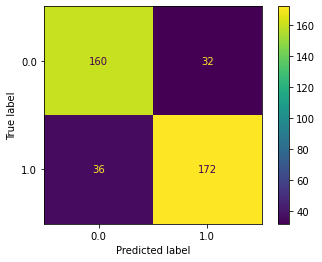

In [38]:
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(k, x_test1, y_test1)  
plt.show()